In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt
import mlxtend as mx
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data=pd.read_csv("Estudiantes.csv")#Leemos el fichero csv
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Parte 1
## Haz el preprocesamiento necesario para generar el DataFrame de entrada donde las 3 columnas de puntuación estén categorizadas en 4 clases diferentes (muy baja, baja, media y alta) con rangos de 25 puntos.

In [3]:
#Agrupa la columna de día del mes de manera que cada uno corresponda a una semana usando una etiqueta de tipo String.
conditionlist = [
    (data['math score'] >= 0) & (data['math score'] <=25),
    (data['math score'] >= 26) & (data['math score'] <=51),
    (data['math score'] >= 52) & (data['math score'] <=77),
    (data['math score'] > 78)]
choicelist = ['muy bajam', 'bajam', 'mediam','altam']
data['math score'] = np.select(conditionlist, choicelist, default='Not Specified')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,mediam,72,74
1,female,group C,some college,standard,completed,mediam,90,88
2,female,group B,master's degree,standard,none,altam,95,93
3,male,group A,associate's degree,free/reduced,none,bajam,57,44
4,male,group C,some college,standard,none,mediam,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,altam,99,95
996,male,group C,high school,free/reduced,none,mediam,55,55
997,female,group C,high school,free/reduced,completed,mediam,71,65
998,female,group D,some college,standard,completed,mediam,78,77


In [4]:
conditionlist = [
    (data['reading score'] >= 0) & (data['reading score'] <=25),
    (data['reading score'] >= 26) & (data['reading score'] <=50),
    (data['reading score'] >= 51) & (data['reading score'] <=76),
    (data['reading score'] > 76)]
choicelist = ['muy bajar', 'bajar', 'mediar','altar']
data['reading score'] = np.select(conditionlist, choicelist, default='Not Specified')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,mediam,mediar,74
1,female,group C,some college,standard,completed,mediam,altar,88
2,female,group B,master's degree,standard,none,altam,altar,93
3,male,group A,associate's degree,free/reduced,none,bajam,mediar,44
4,male,group C,some college,standard,none,mediam,altar,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,altam,altar,95
996,male,group C,high school,free/reduced,none,mediam,mediar,55
997,female,group C,high school,free/reduced,completed,mediam,mediar,65
998,female,group D,some college,standard,completed,mediam,altar,77


In [5]:
conditionlist = [
    (data['writing score'] >= 0) & (data['writing score'] <=25),
    (data['writing score'] >= 26) & (data['writing score'] <=50),
    (data['writing score'] >= 51) & (data['writing score'] <=76),
    (data['writing score'] > 76)]
choicelist = ['muy bajaw', 'bajaw', 'mediaw','altaw']
data['writing score'] = np.select(conditionlist, choicelist, default='Not Specified')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,mediam,mediar,mediaw
1,female,group C,some college,standard,completed,mediam,altar,altaw
2,female,group B,master's degree,standard,none,altam,altar,altaw
3,male,group A,associate's degree,free/reduced,none,bajam,mediar,bajaw
4,male,group C,some college,standard,none,mediam,altar,mediaw
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,altam,altar,altaw
996,male,group C,high school,free/reduced,none,mediam,mediar,mediaw
997,female,group C,high school,free/reduced,completed,mediam,mediar,mediaw
998,female,group D,some college,standard,completed,mediam,altar,altaw


## Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

In [6]:
datos=data.iloc[:,5:8]
datos=np.array(datos)
datos

array([['mediam', 'mediar', 'mediaw'],
       ['mediam', 'altar', 'altaw'],
       ['altam', 'altar', 'altaw'],
       ...,
       ['mediam', 'mediar', 'mediaw'],
       ['mediam', 'altar', 'altaw'],
       ['mediam', 'altar', 'altaw']], dtype=object)

In [7]:
te = TransactionEncoder()
te_ary = te.fit(datos).transform(datos)
df = pd.DataFrame(te_ary, columns=te.columns_)
df=df.drop(columns='Not Specified')

## Primera Configuracion

In [8]:
association_rules1 = apriori(df, min_support=0.001,use_colnames=True)
association_rules1['length']=association_rules1['itemsets'].apply(lambda x: len(x))
association_rules1['frecuencia']=association_rules1['support']*len(data.index)
association_rules1

,support,itemsets,length,frecuencia
0,0.215,(altam),1,215.0
1,0.319,(altar),1,319.0
2,0.303,(altaw),1,303.0
3,0.154,(bajam),1,154.0
4,0.093,(bajar),1,93.0
...,...,...,...,...
57,0.005,"(muy bajam, bajar, bajaw)",3,5.0
58,0.007,"(mediam, mediaw, bajar)",3,7.0
59,0.021,"(mediam, mediar, bajaw)",3,21.0
60,0.394,"(mediam, mediaw, mediar)",3,394.0


## Segunda Configuracion

In [9]:
association_rules2 = apriori(df, min_support=0.01,use_colnames=True)
association_rules2['length']=association_rules2['itemsets'].apply(lambda x: len(x))
association_rules2['frecuencia']=association_rules2['support']*len(data.index)
association_rules2

,support,itemsets,length,frecuencia
0,0.215,(altam),1,215.0
1,0.319,(altar),1,319.0
2,0.303,(altaw),1,303.0
3,0.154,(bajam),1,154.0
4,0.093,(bajar),1,93.0
5,0.119,(bajaw),1,119.0
6,0.610,(mediam),1,610.0
7,0.584,(mediar),1,584.0
8,0.573,(mediaw),1,573.0
9,0.173,"(altar, altam)",2,173.0


## Tercera Configuracion

In [10]:
association_rules3 = apriori(df, min_support=0.1,use_colnames=True)
association_rules3['length']=association_rules3['itemsets'].apply(lambda x: len(x))
association_rules3['frecuencia']=association_rules3['support']*len(data.index)
association_rules3

,support,itemsets,length,frecuencia
0,0.215,(altam),1,215.0
1,0.319,(altar),1,319.0
2,0.303,(altaw),1,303.0
3,0.154,(bajam),1,154.0
4,0.119,(bajaw),1,119.0
5,0.610,(mediam),1,610.0
6,0.584,(mediar),1,584.0
7,0.573,(mediaw),1,573.0
8,0.173,"(altar, altam)",2,173.0
9,0.160,"(altaw, altam)",2,160.0


## ¿Que diferencias hay entre usar soporte y frecuencia?

### Soporte

In [11]:
association_rules1[ (association_rules1['length'] == 3) &
                   (association_rules1['support'] >= 0.001) ]

,support,itemsets,length,frecuencia
42,0.153,"(altar, altaw, altam)",3,153.0
43,0.020,"(altar, mediaw, altam)",3,20.0
44,0.007,"(altaw, mediar, altam)",3,7.0
45,0.035,"(mediaw, mediar, altam)",3,35.0
46,0.101,"(mediam, altar, altaw)",3,101.0
47,0.034,"(mediam, altar, mediaw)",3,34.0
48,0.001,"(altaw, mediar, bajam)",3,1.0
49,0.031,"(mediam, altaw, mediar)",3,31.0
50,0.053,"(bajaw, bajar, bajam)",3,53.0
51,0.005,"(mediaw, bajar, bajam)",3,5.0


### Frecuencia

In [12]:
association_rules1[ (association_rules1['length'] == 3) &
                   (association_rules1['frecuencia'] >= 0.001) ]

,support,itemsets,length,frecuencia
42,0.153,"(altar, altaw, altam)",3,153.0
43,0.020,"(altar, mediaw, altam)",3,20.0
44,0.007,"(altaw, mediar, altam)",3,7.0
45,0.035,"(mediaw, mediar, altam)",3,35.0
46,0.101,"(mediam, altar, altaw)",3,101.0
47,0.034,"(mediam, altar, mediaw)",3,34.0
48,0.001,"(altaw, mediar, bajam)",3,1.0
49,0.031,"(mediam, altaw, mediar)",3,31.0
50,0.053,"(bajaw, bajar, bajam)",3,53.0
51,0.005,"(mediaw, bajar, bajam)",3,5.0


La frecuencia es el numero de veces que aparece un itemset en el dataset y el soporte es la frecuencia entre el numero de transacciones del dataframe.
Por lo tanto no hay ninguna diferencia.

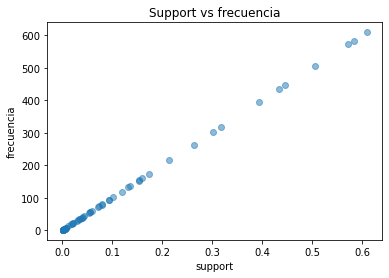

In [13]:
plt.scatter(association_rules1['support'], association_rules1['frecuencia'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('frecuencia')
plt.title('Support vs frecuencia')
plt.show()

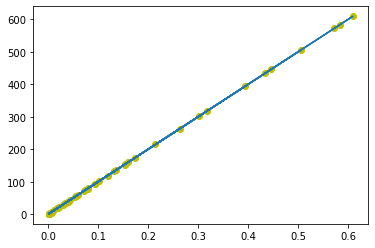

In [14]:
fit = np.polyfit(association_rules1['support'], association_rules1['frecuencia'], 1)
fit_fn = np.poly1d(fit)
plt.plot(association_rules1['support'], association_rules1['frecuencia'], 'yo', association_rules1['support'], 
 fit_fn(association_rules1['support']))

## ¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué? 

Desaparecen las reglas que no cumplen con los requerimientos impuestos por la configuracion. Porque no cumplen la condiciones de la configuracion.

## Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.

In [15]:
rules1 = association_rules(association_rules1, metric="confidence", min_threshold=0.6)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(altam),(altar),0.215,0.319,0.173,0.804651,2.522417,0.104415,3.486071
1,(altam),(altaw),0.215,0.303,0.160,0.744186,2.456060,0.094855,2.724636
2,(altar),(altaw),0.319,0.303,0.264,0.827586,2.731308,0.167343,4.042600
3,(altaw),(altar),0.303,0.319,0.264,0.871287,2.731308,0.167343,5.290846
4,(bajar),(bajam),0.093,0.154,0.059,0.634409,4.119536,0.044678,2.314059


In [16]:
rules12 = association_rules(association_rules1, metric="lift", min_threshold=0.4)
rules12.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(altar),(altam),0.319,0.215,0.173,0.542320,2.522417,0.104415,1.715171
1,(altam),(altar),0.215,0.319,0.173,0.804651,2.522417,0.104415,3.486071
2,(altaw),(altam),0.303,0.215,0.160,0.528053,2.456060,0.094855,1.663322
3,(altam),(altaw),0.215,0.303,0.160,0.744186,2.456060,0.094855,2.724636
4,(mediaw),(altam),0.573,0.215,0.055,0.095986,0.446447,-0.068195,0.868349


INTERPRETACION

## Dadas las mejores configuraciones para cada tipo de puntuación.¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los mejores y peores estudiantes?

# Segunda parte

## Empezaremos obteniendo los itemsets frecuentes para k=1. En este punto necesitaremos obtener el soporte de los itemset.

In [17]:
#Utilizamos todo el dataframe
association_rules1 = apriori(df,use_colnames=True)
association_rules1['length']=association_rules1['itemsets'].apply(lambda x: len(x))
association_rules1['frecuencia']=association_rules1['support']*len(data.index)
association_rules1[ (association_rules1['length'] == 1)]

,support,itemsets,length,frecuencia
0,0.610,(mediam),1,610.0
1,0.584,(mediar),1,584.0
2,0.573,(mediaw),1,573.0


## A partir de k=2 mostrar items candidatos y soporte

In [18]:
association_rules1[ (association_rules1['length'] == 2)]

,support,itemsets,length,frecuencia
3,0.506,"(mediaw, mediar)",2,506.0


## Repetir el proceso hasta que no se muestren items frecuentes

In [19]:
association_rules1[ (association_rules1['length'] == 3)]

,support,itemsets,length,frecuencia


## Mostrar todas las posibles reglas con la confianza de cada una de ellas.

In [20]:
rules1 = association_rules(association_rules1, metric="confidence")
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mediaw),(mediar),0.573,0.584,0.506,0.883072,1.512109,0.171368,3.557731
1,(mediar),(mediaw),0.584,0.573,0.506,0.866438,1.512109,0.171368,3.197026


## Listar todas las reglas que sean de alta confianza.

## Dado un antecesor, devolver todas las reglas que contengan a dicho antecesor.

In [21]:
targeted_rules = rules1[rules1['antecedents'] == {'mediar'}].copy()
targeted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(mediar),(mediaw),0.584,0.573,0.506,0.866438,1.512109,0.171368,3.197026


## Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

In [22]:
targeted_rules1 = association_rules(association_rules1, metric="confidence", min_threshold=0.4)
targeted_rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mediaw),(mediar),0.573,0.584,0.506,0.883072,1.512109,0.171368,3.557731
1,(mediar),(mediaw),0.584,0.573,0.506,0.866438,1.512109,0.171368,3.197026


## Utiliza al menos dos representaciones gráficas para representar las reglas obtenidas e interpretar los datos.

ValueError: x and y must be the same size

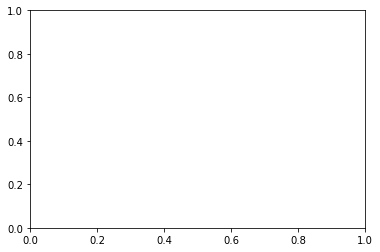

In [23]:
#quizas son soporte y frecuencia
plt.scatter(targeted_rules['support'], targeted_rules1['support'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('frecuencia')
plt.title('Support vs frecuencia')
plt.show()